# Homework 3: Data Cleaning and Exploration (50 points)
## Data 119, Spring 2022

**Pandas Cheat Sheet**: There are several Pandas documentation files you can find with a simple search. This is short and informative: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 3 is due on Friday, April 22 at 6:00am.   Submit by uploading to canvas.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

## Chicago Divvy Data ##

For this exercise, we downloaded the Chicago Divvy data for the last quarter before the pandemic (Q4 of 2019) from:

https://divvy-tripdata.s3.amazonaws.com/index.html

The map of the system is here:
https://member.divvybikes.com/map/

The list of stations can be found here:
https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data

The downloaded dataset has more than 700K rides, and the provided data contains only a subset of the rides that started or ended around Hyde Park.

In [3]:
# Don't change this cell; just run it.
# The code assumes that the Bike.csv file is in the same directory as the notebook
bike=pd.read_csv("Bike.csv")
bike.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
5,25647505,11/5/19 10:18,11/5/19 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN
6,25360277,10/9/19 18:02,10/9/19 18:07,5967,333.0,322,Kimbark Ave & 53rd St,420,Ellis Ave & 55th St,Subscriber,Male,1998.0
7,25470744,10/18/19 13:50,10/18/19 14:16,5418,1540.0,204,Prairie Ave & Garfield Blvd,424,Museum of Science and Industry,Customer,NaN,NaN
8,25795986,11/29/19 13:27,11/29/19 13:31,6334,204.0,247,Shore Dr & 55th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1971.0
9,25820917,12/4/19 13:13,12/4/19 13:20,6404,416.0,418,Ellis Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,1996.0


### Question 1

The file as provided has some duplicate entries (i.e., duplicate rows). A useful pandas tool for dealing with duplicates can be found here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

Write a program to compute the number of duplicated rows in the dataset.  How many are there?

In [4]:
## Answer here and in additional cells if needed
v1 = len(bike)
bike_unique = bike.drop_duplicates()
v2 = len(bike_unique)
v=v1-v2
print("There are", v, "duplicated rows in the dataset.")

There are 20 duplicated rows in the dataset.


### Question 2

Create a data frame called `bikeND` that removes the duplicates and has only unique entries.
Also, calculate the number of unique entries in the `trip_id` column and verify that it is the same as the number of rows.

In [5]:
bikeND = bike.drop_duplicates()
dobby = bikeND["trip_id"].value_counts()

print("There are", len(dobby), "uniques entries in the trip_id column, and the number of rows in bikeND is", len(bikeND),".  It is", len(bikeND) == len(dobby), "that the number of unique entries is equal to the number of rows in the dataframe.")

There are 2438 uniques entries in the trip_id column, and the number of rows in bikeND is 2438 .  It is True that the number of unique entries is equal to the number of rows in the dataframe.


### Question 3

For this and the remaining questions, we will work with the data frame that has unique rows: `bikeND`.

We will now investigate the missing values in the data. Answer these:
1. How many values are missing for each column? 
2. How many rows have one or more missing values?
3. How do missing values differ by user type?


In [6]:
#Question 1: number of missing values per column
bikeND.isnull().sum()

trip_id                0
start_time             0
end_time               0
bikeid                 0
tripduration           0
from_station_id        0
from_station_name      2
to_station_id          0
to_station_name        2
usertype               0
gender               206
birthyear            199
dtype: int64

In [7]:
#Question 2: number of rows with at least one missing value
a=0

for i in range(len(bikeND)):
    b=bikeND.iloc[i].isnull().sum()
    if b>=1:
        a+=1
        
print("There are", a, "rows in bikeND with at least one missing value.")

There are 210 rows in bikeND with at least one missing value.


In [10]:
#Question 3: how missing values differ by user type:
sub = bikeND[bikeND["usertype"] == "Subscriber"]
a=sub.isnull().sum()

cust = bikeND[bikeND["usertype"] == "Customer"]
b=cust.isnull().sum()

total = a+b


data = {"Missing values per column from subscribers": a, "Missing values per column from customers": b, "Total missing data per column": total}



pd.DataFrame(data)

,Missing values per column from subscribers,Missing values per column from customers,Total missing data per column
trip_id,0,0,0
start_time,0,0,0
end_time,0,0,0
bikeid,0,0,0
tripduration,0,0,0
from_station_id,0,0,0
from_station_name,2,0,2
to_station_id,0,0,0
to_station_name,2,0,2
usertype,0,0,0


### Question 4


In this question, we will look into recovering some of the missing data. Answer these:

1. Which missing values can be recovered? 
2. For those that can be recovered, impute their values.

Hint: station ids versus station names.

In [ ]:
#1) Given that station names (both to and from) correlate with station ID, this means that we can use one to recover the other.
#Given that we have no missing station IDs, but some missing station names, we can recover the latter using the former.  However, we cannot recover usertype and gender from the data

In [115]:
#from station fixed:
data = {"id": bikeND["from_station_id"], "name": bikeND["from_station_name"]}
rows = pd.DataFrame(data)
columns = rows.drop_duplicates().dropna()

bikeND["from_station_name"].fillna("x",inplace = True)

numbers = []

for i in range(len(bikeND)):
    if bikeND.iloc[i]["from_station_name"] == "x":
        numbers.append(i)
        
for i in numbers:
    for j in range(len(columns)):
        if bikeND.iloc[i]["from_station_id"] == columns.iloc[j]["id"]:
            bikeND.loc[bikeND["from_station_name"] == "x", ["from_station_name"]] = columns.iloc[j]["name"]

#to station fixed:

bikeND["to_station_name"].fillna("y",inplace = True)

values = []

for i in range(len(bikeND)):
    if bikeND.iloc[i]["to_station_name"] == "y":
        values.append(i)
        
for i in values:
    for j in range(len(columns)):
        if bikeND.iloc[i]["to_station_id"] == columns.iloc[j]["id"]:
            bikeND.loc[bikeND["to_station_name"] == "y", ["to_station_name"]] = columns.iloc[j]["name"]

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [114]:
data = {"id": bikeND["from_station_id"], "name": bikeND["from_station_name"]}
rows = pd.DataFrame(data)
columns = rows.drop_duplicates().dropna()
columns

,id,name
0,424,Museum of Science and Industry
1,345,Lake Park Ave & 56th St
2,423,University Ave & 57th St
3,248,Woodlawn Ave & 55th St
4,322,Kimbark Ave & 53rd St
...,...,...
2207,38,Clark St & Lake St
2213,403,Wentworth Ave & 33rd St
2279,280,Morgan St & 31st St
2347,301,Clark St & Schiller St


### Question 5

Print the row that has the longest trip. Before that, investigate the data types for the columns to make sure trip duration is numerical.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [94]:
## Answer here and in additional cells if needed
print(bikeND["tripduration"].dtypes)

bikeND[bikeND["tripduration"] == bikeND["tripduration"].max()]

float64


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_hour
408,25575836,10/27/19 15:12,10/28/19 14:09,1187,82667.0,424,Museum of Science and Industry,653,Cornell Dr & Hayes Dr,Customer,NaN,NaN,15


In [13]:
#outliers:
q3 = bikeND["tripduration"].quantile(0.75)
maximum = q3 * 1.5
maximum

867.0

### Question 6

Investigate if trip durations have similar distributions for male and female riders using a visualization. Create a graph that is useful for this comparison.

Text(0.5, 1.0, 'How trip duration varies by gender')

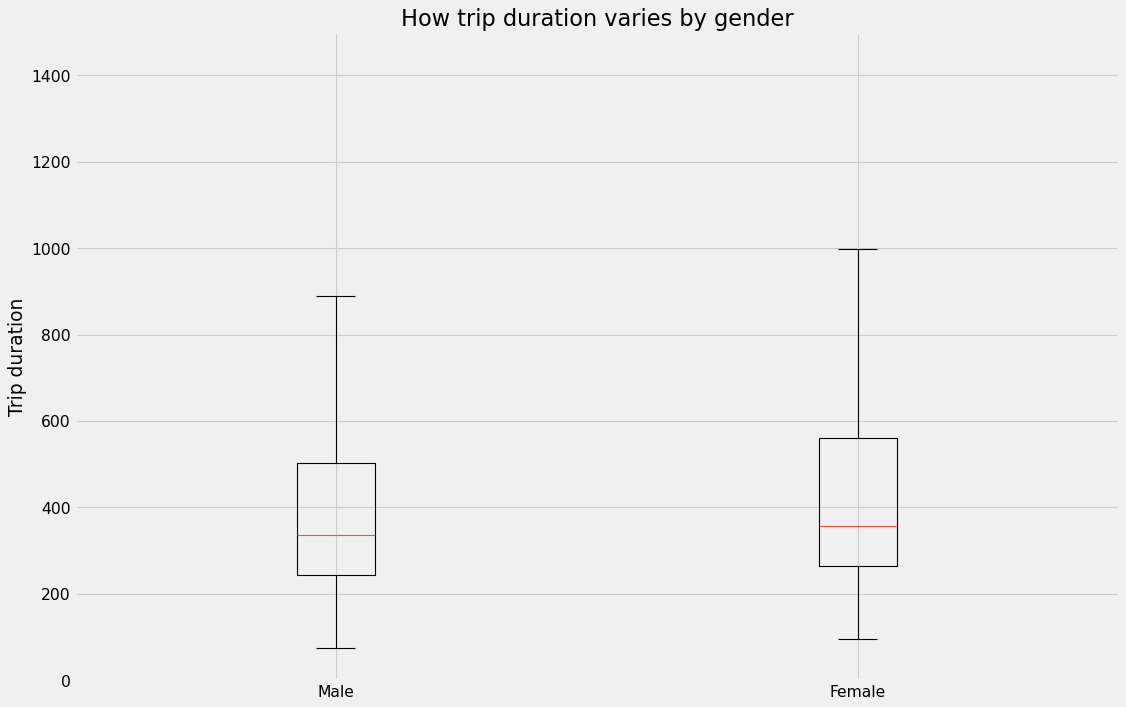

In [105]:
## Answer here and in additional cells if needed
no_outliers = bikeND[bikeND["tripduration"] < 6000]


male = no_outliers[no_outliers["gender"] == "Male"]
female = no_outliers[no_outliers["gender"] == "Female"]

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

data = {"Male": male["tripduration"], "Female": female["tripduration"]}

plt.boxplot(data.values(), showfliers = False)
plt.xticks([1,2], ["Male", "Female"])
plt.ylim([0, 1500])
plt.ylabel("Trip duration")
plt.title("How trip duration varies by gender")

In [ ]:
#Excluding outliers, we observe that, in general, the distribution of women's trip durations is higher than that of men.
#To specify, the mean female trip duration is higher than the mean male trip duration and the lower and upper quantile bounds for womens' trip duration is also higher
#Thus, we can determine that women have both a higher mean trip duration and higher distribution of trip durations than men.

### Question 7

Here we investigate the impact of age on trip duration. First create a variable that indicates who is born between 1997-2001 (proxy for college students) versus born in other years. Similarly to Question 6, investigate if trip durations have similar distributions for the two age groups using visualization. Note that riders with no information on age should be ignored for this question.


Text(0.5, 1.0, 'How trip duration between those born within 1997-2001 and those born outside of that range')

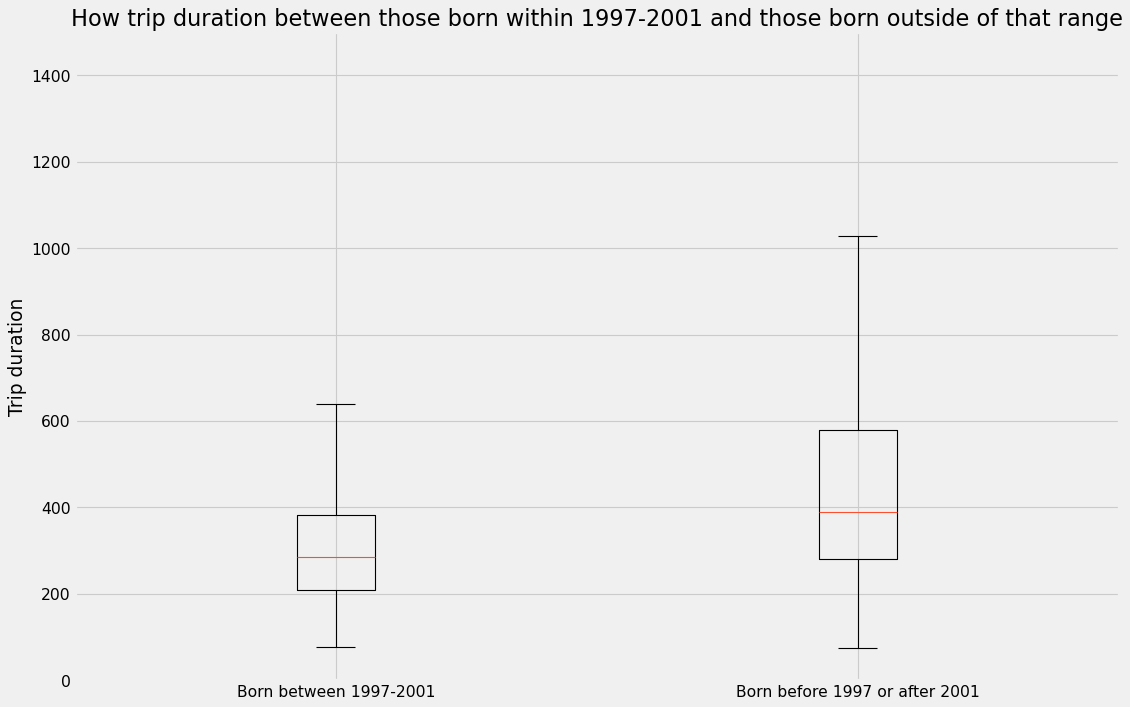

In [106]:
## Answer here and in additional cells if needed
bikeND

yes = no_outliers.loc[(no_outliers["birthyear"] > 1996) & (no_outliers["birthyear"] < 2002)]
no = no_outliers.loc[(no_outliers["birthyear"] < 1997) | (no_outliers["birthyear"] > 2001)]

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)


data = {"1997-2001": yes["tripduration"], "No": no["tripduration"]}

plt.boxplot(data.values(), showfliers = False)
plt.xticks([1,2], ["Born between 1997-2001", "Born before 1997 or after 2001"])
plt.ylim([0, 1500])
plt.ylabel("Trip duration")
plt.title("How trip duration between those born within 1997-2001 and those born outside of that range")

In [ ]:
#From the graph above, we can conclude that the mean trip duration of those born between 1997-2001 is lower than that of people born outside of that year range.
#Similarly, we can determine that lowest, non-outlier trip duration, is slightly lower for people born between 1997-2001 than for people born outside of that range, while the highest non-outlier duration is much higher for the latter group.

### Question 8

For all riders whose birth year is available, calculate their approximate age (remember, this data is from late 2019) and create a plot that shows how trip duration varies with age.


/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_30142/3791724531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers["age"] = 2019 - no_outliers["birthyear"]


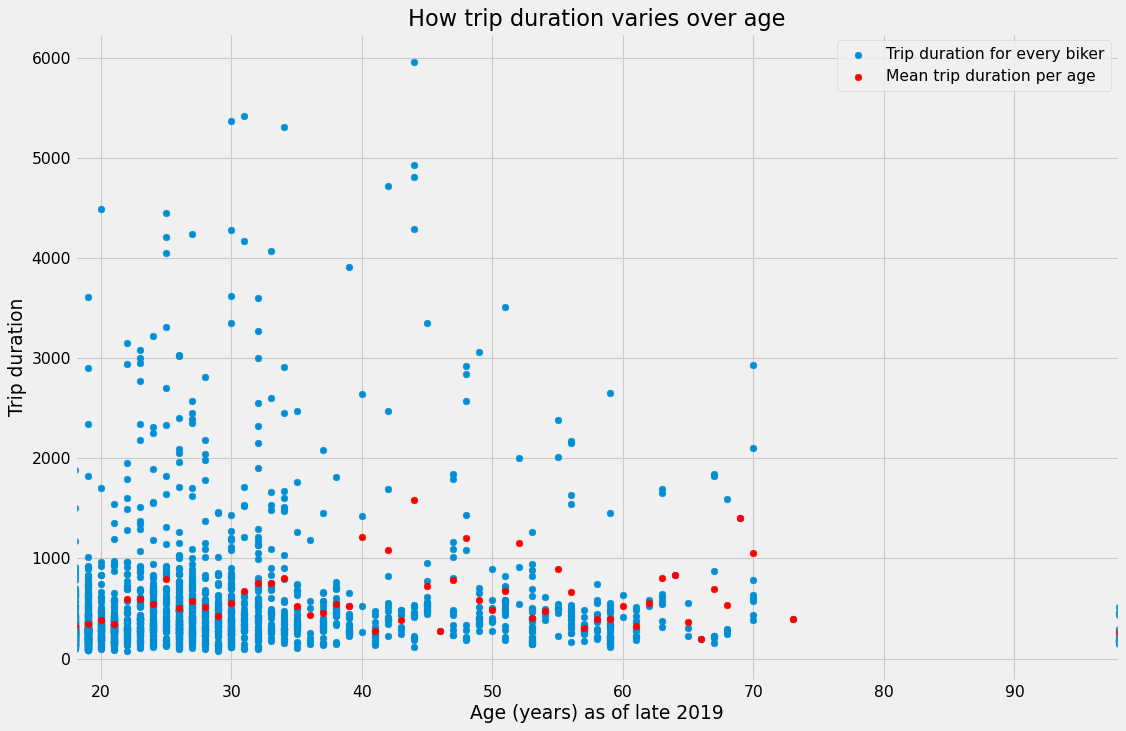

In [107]:
## Answer here and in additional cells if needed
no_outliers["age"] = 2019 - no_outliers["birthyear"]

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

axis = no_outliers.groupby(by = "age")["tripduration"].mean().reset_index()
axis

plt.scatter(no_outliers["age"], no_outliers["tripduration"], label = "Trip duration for every biker")
plt.scatter(axis["age"], axis["tripduration"], color="r", label = "Mean trip duration per age")
plt.xlabel("Age (years) as of late 2019")
plt.ylabel("Trip duration")
plt.xlim([no_outliers["age"].min(), no_outliers["age"].max()])
plt.title("How trip duration varies over age")
plt.legend()

In [97]:
#The graph supports the claim that there is little relationship between age and trip duration, as mean trip duration oscillates over time

r = np.corrcoef(axis["age"], axis["tripduration"])[0,1]
print("Furthermore, given that the correlation coefficient is", r, ", there exists little evidence that variations in trip durations are caused by age")

Furthermore, given that the correlation coefficient is 0.05857190466237635 , there exists little evidence that variations in trip durations are caused by age


### Question 9

Extract day of the week from `start_time` and look at trip duration by day of the week. Create a plot that summarizes your findings.

Hint. Options for extracting day of the week:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html


/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_30142/1635614162.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers["Day of week"] = day


Text(0.5, 1.0, 'Trip duration of bike riders acrosss days of the week')

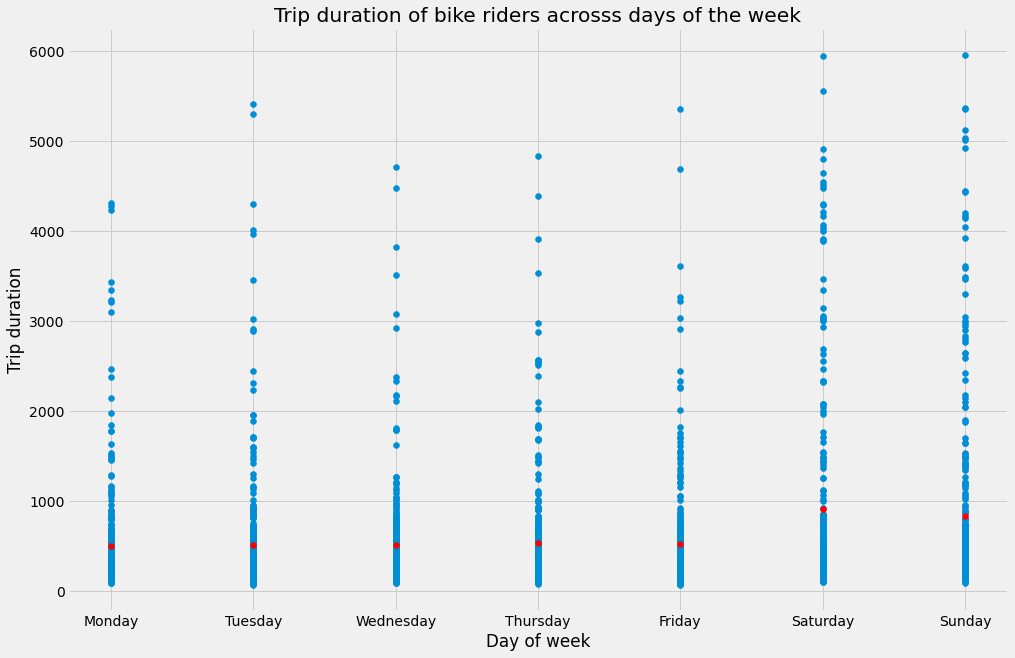

In [110]:
## Answer here and in additional cells if needed
import datetime

z=[]
day=[]

for i in range(len(no_outliers)):
    vix = no_outliers.iloc[i]["start_time"].split( )[0]
    z.append(vix)
    
for i in range(len(z)):
    f = pd.date_range(start=z[i], freq='D', periods=1)
    week = f[0].dayofweek
    day.append(week)
    
no_outliers["Day of week"] = day

bark = no_outliers.groupby(by = "Day of week")["tripduration"].mean().reset_index()
bark

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(no_outliers["Day of week"], no_outliers["tripduration"])
plt.scatter(bark["Day of week"], bark["tripduration"], color="r")
plt.xlabel("Day of week")
plt.xticks([0,1,2,3,4,5,6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.ylabel("Trip duration")
plt.title("Trip duration of bike riders acrosss days of the week")

In [111]:
print("As the plot above shows, the highest mean trip durations occur on days 6 and 7 (Saturday and Sunday respectively) of the week.  This makes sense, because people would ride more when they have more free time (ie on the weekend)")
print("On this note, we also observe that the longest non-outlier trips occured on Saturday and Sunday")

As the plot above shows, the highest mean trip durations occur on days 6 and 7 (Saturday and Sunday respectively) of the week.  This makes sense, because people would ride more when they have more free time (ie on the weekend)
On this note, we also observe that the longest non-outlier trips occured on Saturday and Sunday


### Question 10

Station 423 is in front of Regenstein Library. What is the most common hour of the day (10am, 11pm etc) to start a trip there? What is the most common hour of the day to end a trip there? 

For this exercise, all the trips that start between 10:00am and 10:59am are considered in the 10am group.


In [49]:
## Answer here and in additional cells if needed


x=[]

for i in range(len(Fourtwothree)):
    num=Fourtwothree.iloc[i]["start_time"].split( )[1].split(":")[0]
    x.append(num)

Fourtwothree["start_hour"] = x
Fourtwothree["start_hour"].value_counts()


Fourtwothreetwo = bikeND[bikeND["to_station_id"] == 423]

Fourtwothreetwo

y=[]

for i in range(len(Fourtwothreetwo)):
    val=Fourtwothreetwo.iloc[i]["end_time"].split( )[1].split(":")[0]
    y.append(val)

Fourtwothreetwo["end_hour"] = y
Fourtwothreetwo["end_hour"].value_counts()

print("The most common hour to start a bike trip is at", Fourtwothree["start_hour"].value_counts().reset_index().iloc[0,0], "hours (MST).")
print("The most common hour to end a bike trip is at", Fourtwothreetwo["end_hour"].value_counts().reset_index().iloc[0,0], "hours (MST).")

The most common hour to start a bike trip is at 17 hours (MST).
The most common hour to end a bike trip is at 9 hours (MST).


/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_30142/1164643558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fourtwothree["start_hour"] = x
/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_30142/1164643558.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fourtwothreetwo["end_hour"] = y


### Question 11

Find the most popular date for bike riding in this dataset.

In [160]:
z=[]

for i in range(len(bikeND)):
    vix = bikeND.iloc[i]["start_time"].split( )[0]
    z.append(vix)
    
bikeND["Date"] = z

peak = bikeND["Date"].value_counts().reset_index().iloc[0,0]

print("The most popular date for bike riding in the dataset was", peak, ".")

The most popular date for bike riding in the dataset was 10/3/19 .


/var/folders/zb/cqngm18x18v4wmpfr61z84jc0000gn/T/ipykernel_2270/3086511364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeND["Date"] = z


### Question 12

Ask an interesting question that you could answer with these data and **then provide a data-based answer to your question.** 

(For example, "Do younger riders take longer trips?" - of course you can't use this one since it's already been asked and answered above.)

In [27]:
#Question of interest: do customers or subscribers take longer trips?
bikeND.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/19 13:39,10/7/19 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/19 16:44,10/27/19 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/19 17:24,12/4/19 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/19 18:32,11/19/19 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/19 21:09,11/16/19 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0


Text(0, 0.5, 'Trip duration')

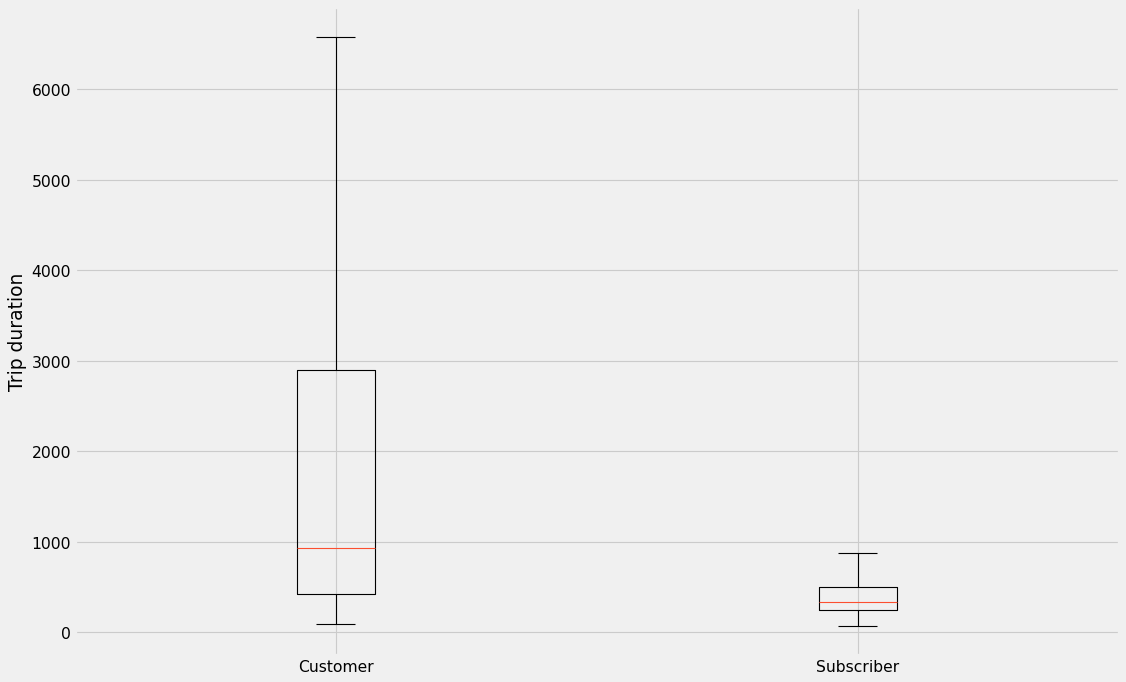

In [91]:
one = bikeND[bikeND["usertype"] == "Subscriber"]
two = bikeND[bikeND["usertype"] == "Customer"]

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)


dk = {"Customer": two["tripduration"], "Subscriber": one["tripduration"]}

plt.boxplot(dk.values(), showfliers = False)
plt.xticks([1,2], ["Customer", "Subscriber"])
plt.ylabel("Trip duration")

In [108]:
#Answer: from the graph above, we can observe that the mean trip duration for a customer is much higher than the mean trip duration for a subscriber.
#We also observe that the longest non-outlier customer trip was much longer than that of subscriber group, while the shortest customer trip was not much lower than that of the subscriber group.
#Thus, we can conclude that customers, in general, take longer trips than subscribers.